In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sys
sys.path.append('../../../')

import fedlab_benchmarks
from fedlab_benchmarks.datasets import Adult

from fedlab.utils.dataset import AdultPartitioner
from fedlab.utils.functional import partition_report, save_dict

import torch
from torch.utils.data import DataLoader

# Adult Dataset

In [2]:
trainset = Adult('../../../../data/adult-a9a/', train=True, download=True)
train_loader = DataLoader(trainset, batch_size=20, shuffle=True)
print(f"Train data size: {len(trainset)}")
print(f"Train feature number: {trainset.data.shape[1]}")
print(f"Train class distribution: class0:class1 = "
      f"{int(trainset.targets.sum())}:{len(trainset)-trainset.targets.sum()}")

Source file already downloaded.
Local file ../../../../data/adult-a9a/a9a loaded.
Train data size: 32561
Train feature number: 123
Train class distribution: class0:class1 = 7841:24720


In [3]:
testset = Adult('../../../../data/adult-a9a/', train=False, download=True)
test_loader = DataLoader(trainset, batch_size=20, shuffle=True)
print(f"Test data size: {len(testset)}")
print(f"Test feature number: {testset.data.shape[1]}")
print(f"Test class distribution: class0:class1 = "
      f"{int(testset.targets.sum())}:{len(testset)-testset.targets.sum()}")

Source file already downloaded.
Local file ../../../../data/adult-a9a/a9a.t loaded.
Test data size: 16281
Test feature number: 123
Test class distribution: class0:class1 = 3846:12435


# Adult Data Partition

In [4]:
num_clients = 10
num_classes = 2
seed = 2021

col_names = [f"class{i}" for i in range(num_classes)]

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

## Label distribution skew
### Quantity-based

In [5]:
# perform partition
noniid_major_label_part = AdultPartitioner(trainset.targets, 
                                           num_clients=num_clients,
                                           partition="noniid-#label", 
                                           major_classes_num=1,
                                           seed=seed)

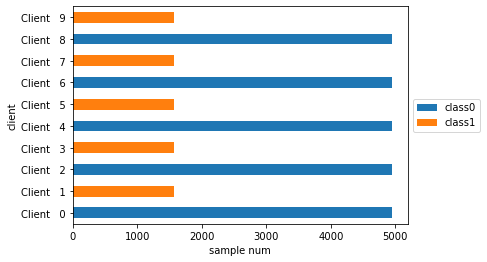

In [6]:
# generate partition report
csv_file = "../partition-reports/adult_noniid-label1_10clients.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file,header=1)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('client')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/adult_noniid-label1_10clients.png", 
            dpi=400, bbox_inches = 'tight')

### Distributed-based (Dirichlet) 

In [7]:
# perform partition
noniid_labeldir_part = AdultPartitioner(trainset.targets, 
                                        num_clients=num_clients,
                                        partition="noniid-labeldir", 
                                        dir_alpha=0.5,
                                        seed=seed)

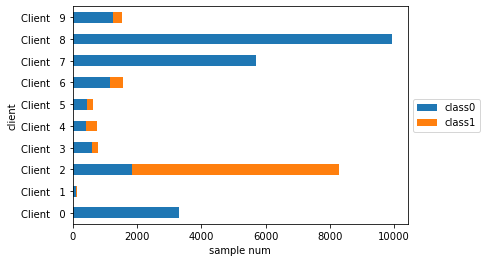

In [8]:
# generate partition report
csv_file = "../partition-reports/adult_noniid_labeldir_10clients.csv"
partition_report(trainset.targets, noniid_labeldir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_labeldir_part_df = pd.read_csv(csv_file,header=1)
noniid_labeldir_part_df = noniid_labeldir_part_df.set_index('client')
for col in col_names:
    noniid_labeldir_part_df[col] = (noniid_labeldir_part_df[col] * noniid_labeldir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
noniid_labeldir_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/adult_noniid_labeldir_10clients.png", 
            dpi=400, bbox_inches = 'tight')

## Quantity skew (Dirichlet)

In [9]:
# perform partition
unbalance_part = AdultPartitioner(trainset.targets, 
                                  num_clients=num_clients,
                                  partition="unbalance", 
                                  dir_alpha=0.5,
                                  seed=seed)

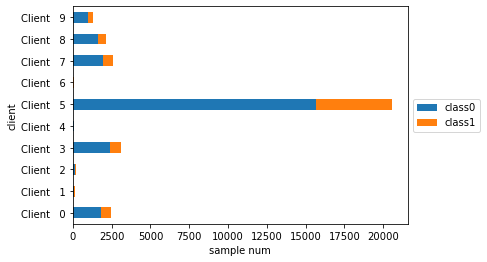

In [10]:
# generate partition report
csv_file = "../partition-reports/adult_unbalance_10clients.csv"
partition_report(trainset.targets, unbalance_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_part_df = pd.read_csv(csv_file,header=1)
unbalance_part_df = unbalance_part_df.set_index('client')
for col in col_names:
    unbalance_part_df[col] = (unbalance_part_df[col] * unbalance_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/adult_unbalance_10clients.png", 
            dpi=400, bbox_inches = 'tight')

## IID

In [11]:
# perform partition
iid_part = AdultPartitioner(trainset.targets, 
                            num_clients=num_clients,
                            partition="iid",
                            seed=seed)

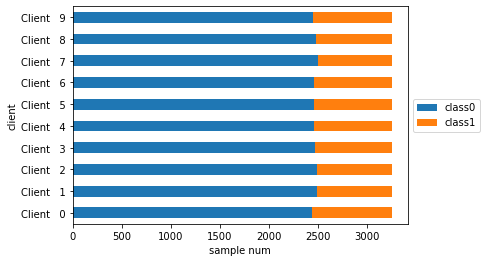

In [12]:
# generate partition report
csv_file = "../partition-reports/adult_iid_10clients.csv"
partition_report(trainset.targets, iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

iid_part_df = pd.read_csv(csv_file,header=1)
iid_part_df = iid_part_df.set_index('client')
for col in col_names:
    iid_part_df[col] = (iid_part_df[col] * iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
iid_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/adult_iid_10clients.png", 
            dpi=400, bbox_inches = 'tight')